In [1]:
import pandas as pd
import pickle
import os
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder = "../results"

X_test = pd.read_csv(f"{folder}/X_test.csv")
y_test = pd.read_csv(f"{folder}/y_test.csv")

In [3]:
y_test

,Unnamed: 0,play_type,wpa_avg
0,24318,field_goal,-0.002428
1,2499,pass,0.000008
2,7193,field_goal,0.100270
3,1028,punt,-0.019192
4,13155,field_goal,0.031948
...,...,...,...
4686,5805,punt,-0.018951
4687,840,field_goal,-0.055462
4688,418,punt,0.049172
4689,13654,field_goal,0.064643


In [4]:
X_test

,Unnamed: 0.1,Unnamed: 0,week,yardline_100,half_seconds_remaining,game_seconds_remaining,drive,ydstogo,ydsnet,play_type,...,ep,drive_play_count,spread_line,posteam_is_home,posteam_spread_line,wp_avg,is_reg_season,wp_difference,posteam_rush_epa_per_sec,posteam_pass_epa_per_sec
0,24318,284509,16,25.0,23.0,1823.0,9.0,7.0,55.0,field_goal,...,2.337775,11.0,-2.5,True,-2.5,0.912748,True,0.032106,0.000250,0.011193
1,2499,27874,11,61.0,216.0,216.0,22.0,3.0,30.0,pass,...,-0.457395,10.0,8.0,False,-8.0,0.000045,True,0.000062,0.001151,-0.008734
2,7193,80864,12,33.0,1047.0,2847.0,3.0,8.0,42.0,field_goal,...,1.129352,7.0,-3.0,True,-3.0,0.457399,True,0.154235,0.002856,0.003086
3,1028,11756,5,67.0,560.0,560.0,18.0,2.0,8.0,punt,...,-0.631057,3.0,6.0,False,-6.0,0.897088,True,0.051163,0.004453,0.004551
4,13155,150392,1,25.0,996.0,996.0,18.0,2.0,43.0,field_goal,...,2.026982,11.0,-2.5,True,-2.5,0.717615,True,0.088836,0.000902,0.002616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,5805,64914,6,40.0,1451.0,3251.0,2.0,23.0,45.0,punt,...,-0.154721,6.0,1.0,False,-1.0,0.511014,True,0.029273,0.008165,0.001358
4687,840,9623,4,34.0,30.0,1830.0,12.0,1.0,41.0,field_goal,...,1.486608,9.0,-9.5,True,-9.5,0.191011,True,0.165577,-0.003491,-0.007454
4688,418,4658,2,61.0,37.0,1837.0,11.0,25.0,-2.0,punt,...,-0.092294,6.0,-3.0,False,3.0,0.608375,True,0.162120,0.000250,0.001915
4689,13654,156996,3,34.0,815.0,2615.0,4.0,7.0,41.0,field_goal,...,0.893130,7.0,-3.0,True,-3.0,0.316138,True,0.132152,-0.004416,-0.005258


In [5]:
y_test

,Unnamed: 0,play_type,wpa_avg
0,24318,field_goal,-0.002428
1,2499,pass,0.000008
2,7193,field_goal,0.100270
3,1028,punt,-0.019192
4,13155,field_goal,0.031948
...,...,...,...
4686,5805,punt,-0.018951
4687,840,field_goal,-0.055462
4688,418,punt,0.049172
4689,13654,field_goal,0.064643


In [6]:

all_results = []
for filename in os.listdir(folder):
    
    if '.pickle' not in filename:
        continue
        
    path = f"{folder}/{filename}"
    
    with open(path, 'rb') as f:

        results_list = pickle.load(f)
    
    filename = filename[:len(filename)-7]
    end = filename.find("max")
    num1 = float(filename[3:end])
    num2 = float(filename[end+3:])
    
    temp_dict = {"min_threshold": num1, "max_threshold": num2}
    
    for i, result in enumerate(results_list):
        temp_dict[f"res{i}"] = result
    
        
    
    all_results.append(temp_dict)
    
    
df = pd.DataFrame(all_results)
    
            
   

In [7]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
min_threshold,0.1,0.02,0.0,0.05,0.02,0.01,0.01,0.05,0.05,0.05,...,-1.0,0.0001,0.0,0.1,0.00001,0.0001,0.001,-1.0,0.0001,0.001
max_threshold,0.99999,0.999,0.9999,0.85,0.99,0.9,0.85,0.999,0.9999,2.0,...,1.0,0.85,0.9,0.9,0.6,0.99,0.99,0.6,1.0,0.9999
res0,"(field_goal, -0.0035748686641454697)",field_goal,"(field_goal, -0.0035748686641454697)",field_goal,field_goal,field_goal,field_goal,field_goal,"(field_goal, -0.0035748686641454697)","(field_goal, -0.0035748686641454697)",...,"(punt, 0.02120721898972988)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"(field_goal, -0.0035748686641454697)","(field_goal, -0.0035748686641454697)"
res1,"(pass, 0.0022958742920309305)","(run, 0.008796891197562218)","(run, 0.008796891197562218)",pass,"(run, 0.008796891197562218)","(run, 0.008796891197562218)",pass,"(punt, 0.00831572338938713)","(punt, 0.00831572338938713)","(punt, 0.00831572338938713)",...,"(run, 0.008796891197562218)",pass,"(run, 0.008796891197562218)","(pass, 0.0022958742920309305)",pass,"(run, 0.008796891197562218)","(run, 0.008796891197562218)",pass,"(run, 0.008796891197562218)","(run, 0.008796891197562218)"
res2,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"(field_goal, 0.10374753922224045)",...,"(field_goal, 0.10374753922224045)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"(field_goal, 0.10374753922224045)",field_goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
res4686,"(punt, -0.02481570467352867)",punt,"(pass, 0.03573529049754143)",punt,punt,punt,punt,punt,"(punt, -0.02481570467352867)","(punt, -0.02481570467352867)",...,"(field_goal, 0.047919075936079025)",punt,punt,punt,punt,punt,punt,punt,"(pass, 0.03573529049754143)","(punt, -0.02481570467352867)"
res4687,"(field_goal, -0.055295247584581375)",field_goal,"(pass, -0.014823885634541512)",field_goal,field_goal,field_goal,field_goal,field_goal,"(field_goal, -0.055295247584581375)","(field_goal, -0.055295247584581375)",...,"(run, 0.009301752783358097)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"(pass, -0.014823885634541512)","(field_goal, -0.055295247584581375)"
res4688,"(punt, 0.04688672348856926)","(punt, 0.04688672348856926)","(punt, 0.04688672348856926)",punt,"(punt, 0.04688672348856926)",punt,punt,"(punt, 0.04688672348856926)","(punt, 0.04688672348856926)","(punt, 0.04688672348856926)",...,"(punt, 0.04688672348856926)",punt,punt,punt,punt,"(punt, 0.04688672348856926)","(punt, 0.04688672348856926)",punt,"(punt, 0.04688672348856926)","(punt, 0.04688672348856926)"
res4689,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"(field_goal, 0.03973030298948288)",...,"(field_goal, 0.03973030298948288)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"(field_goal, 0.03973030298948288)",field_goal


In [8]:
df.to_csv(f"{folder}/accum_results.csv")

In [9]:
'''
accuracy: predicted play represents actual play
classifier percent: what percent of plays chosen by classifier
'''


'\naccuracy: predicted play represents actual play\nclassifier percent: what percent of plays chosen by classifier\n'

In [10]:
df = pd.read_csv(f"{folder}/accum_results.csv")
df = df.transpose()
df.drop("Unnamed: 0", inplace=True)

In [11]:
df.loc["res44", 0]

"('run', 0.08467203378677368)"

In [12]:
df[0].loc["res44"]

"('run', 0.08467203378677368)"

In [13]:
exclude_indexes = ["min_threshold", "max_threshold"]

filtered_df = df.drop(index=exclude_indexes)
filtered_df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
res0,"('field_goal', -0.0035748686641454697)",field_goal,"('field_goal', -0.0035748686641454697)",field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', -0.0035748686641454697)","('field_goal', -0.0035748686641454697)",...,"('punt', 0.02120721898972988)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', -0.0035748686641454697)","('field_goal', -0.0035748686641454697)"
res1,"('pass', 0.0022958742920309305)","('run', 0.008796891197562218)","('run', 0.008796891197562218)",pass,"('run', 0.008796891197562218)","('run', 0.008796891197562218)",pass,"('punt', 0.00831572338938713)","('punt', 0.00831572338938713)","('punt', 0.00831572338938713)",...,"('run', 0.008796891197562218)",pass,"('run', 0.008796891197562218)","('pass', 0.0022958742920309305)",pass,"('run', 0.008796891197562218)","('run', 0.008796891197562218)",pass,"('run', 0.008796891197562218)","('run', 0.008796891197562218)"
res2,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.10374753922224045)",...,"('field_goal', 0.10374753922224045)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.10374753922224045)",field_goal
res3,punt,punt,punt,punt,punt,punt,punt,punt,punt,"('punt', -0.024795500561594963)",...,"('run', 0.008795947767794132)",punt,punt,punt,punt,punt,punt,punt,"('punt', -0.024795500561594963)",punt
res4,"('field_goal', 0.03830188140273094)",field_goal,"('field_goal', 0.03830188140273094)",field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.03830188140273094)","('field_goal', 0.03830188140273094)",...,"('run', 0.07477133721113205)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.03830188140273094)","('field_goal', 0.03830188140273094)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
res4686,"('punt', -0.02481570467352867)",punt,"('pass', 0.03573529049754143)",punt,punt,punt,punt,punt,"('punt', -0.02481570467352867)","('punt', -0.02481570467352867)",...,"('field_goal', 0.047919075936079025)",punt,punt,punt,punt,punt,punt,punt,"('pass', 0.03573529049754143)","('punt', -0.02481570467352867)"
res4687,"('field_goal', -0.055295247584581375)",field_goal,"('pass', -0.014823885634541512)",field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', -0.055295247584581375)","('field_goal', -0.055295247584581375)",...,"('run', 0.009301752783358097)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('pass', -0.014823885634541512)","('field_goal', -0.055295247584581375)"
res4688,"('punt', 0.04688672348856926)","('punt', 0.04688672348856926)","('punt', 0.04688672348856926)",punt,"('punt', 0.04688672348856926)",punt,punt,"('punt', 0.04688672348856926)","('punt', 0.04688672348856926)","('punt', 0.04688672348856926)",...,"('punt', 0.04688672348856926)",punt,punt,punt,punt,"('punt', 0.04688672348856926)","('punt', 0.04688672348856926)",punt,"('punt', 0.04688672348856926)","('punt', 0.04688672348856926)"
res4689,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.03973030298948288)",...,"('field_goal', 0.03973030298948288)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.03973030298948288)",field_goal


In [14]:
def classifier_percent(y_pred):
    classifier_used = 0
    n = len(y_pred)
    for y in y_pred:
        if y[0] != "(":
            classifier_used += 1
    return classifier_used / n


def regressor_accuracy(y_true, y_pred):
    num_correct = 0
    num_total = 0
    for y, y_hat in zip(y_true, y_pred):
        
        if y_hat[0] == "(":
            
            y_hat, num = ast.literal_eval(y_hat)
            
            if y_hat == y:
                num_correct += 1
            num_total += 1
                
    return num_correct / len(y_test)

def accuracy(y_true, y_pred):
    
    
    num_correct = 0
    for y, y_hat in zip(y_true, y_pred):
        
        if y_hat[0] == "(":
            
            y_hat, num = ast.literal_eval(y_hat)
            
        if y_hat == y:
            num_correct += 1
                
    return num_correct / len(y_test)


def get_all_metrics(y_test, df):
    all_res = []
    

    y_test = y_test["play_type"].tolist()
    n = len(y_test)
    
    for i in range(df.shape[1]): # have to loop through each of the models
        
        min_thresh = df[i].loc["min_threshold"]
        max_thresh = df[i].loc["max_threshold"]
        
        curr_res = {"min_thresh": min_thresh,
                    "max_thresh": max_thresh}
        
        exclude_indexes = ["min_threshold", "max_threshold"]

        y_pred = df[i].drop(index=exclude_indexes).tolist()
        
        
        acc = accuracy(y_test, y_pred)
        cp = classifier_percent(y_pred)
        ra = regressor_accuracy(y_test, y_pred)
        
    
        
        curr_res['accuracy'] = acc
        curr_res['classifier_percent'] = cp
        curr_res["regression_accuracy"] = ra
        
        all_res.append(curr_res)
               
    return all_res

In [15]:
mets = get_all_metrics(y_test , df)
res_df = pd.DataFrame(mets)
res_df

,min_thresh,max_thresh,accuracy,classifier_percent,regression_accuracy
0,0.1000,0.99999,0.886805,0.346621,0.541036
1,0.0200,0.99900,0.842251,0.628437,0.216372
2,0.0000,0.99990,0.685781,0.346621,0.340013
3,0.0500,0.85000,0.893626,0.833937,0.078235
4,0.0200,0.99000,0.842251,0.637391,0.207418
...,...,...,...,...,...
76,0.0001,0.99000,0.797058,0.637391,0.162226
77,0.0010,0.99000,0.797058,0.637391,0.162226
78,-1.0000,0.60000,0.921978,0.971008,0.007035
79,0.0001,1.00000,0.685781,0.000000,0.685781


<AxesSubplot:xlabel='max_thresh', ylabel='accuracy'>

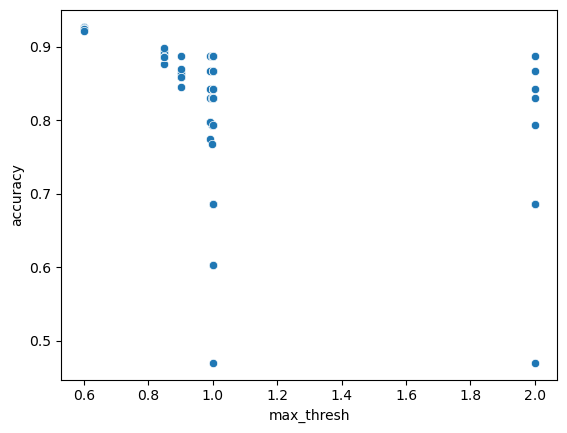

In [16]:
sns.scatterplot(data = res_df, x="max_thresh", y = "accuracy")

<AxesSubplot:xlabel='max_thresh', ylabel='classifier_percent'>

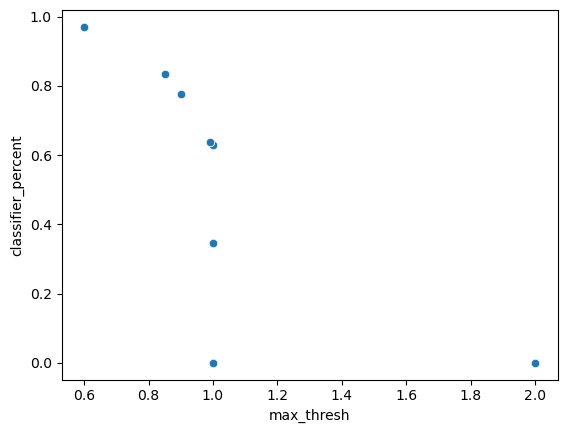

In [17]:
sns.scatterplot(data = res_df, x="max_thresh", y = "classifier_percent")

<AxesSubplot:xlabel='max_thresh', ylabel='regression_accuracy'>

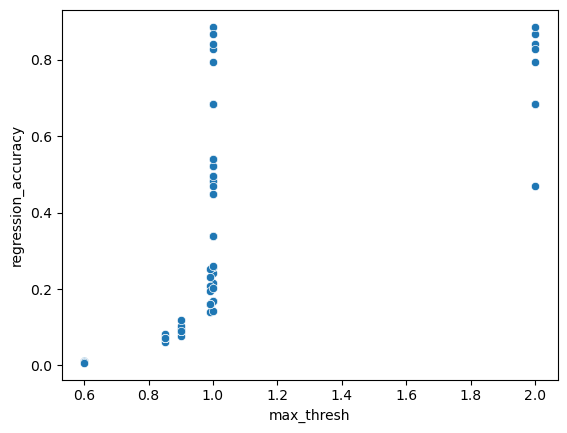

In [18]:
sns.scatterplot(data = res_df, x="max_thresh", y = "regression_accuracy")

<AxesSubplot:xlabel='min_thresh', ylabel='regression_accuracy'>

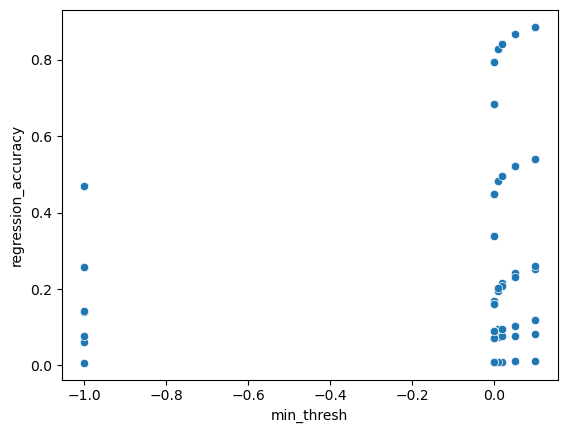

In [19]:
sns.scatterplot(data = res_df, x="min_thresh", y = "regression_accuracy")

<AxesSubplot:xlabel='classifier_percent', ylabel='regression_accuracy'>

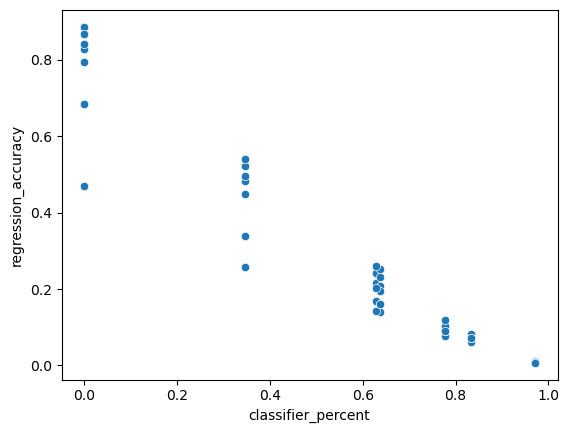

In [20]:
sns.scatterplot(data = res_df, x="classifier_percent", y = "regression_accuracy")

<AxesSubplot:xlabel='classifier_percent', ylabel='accuracy'>

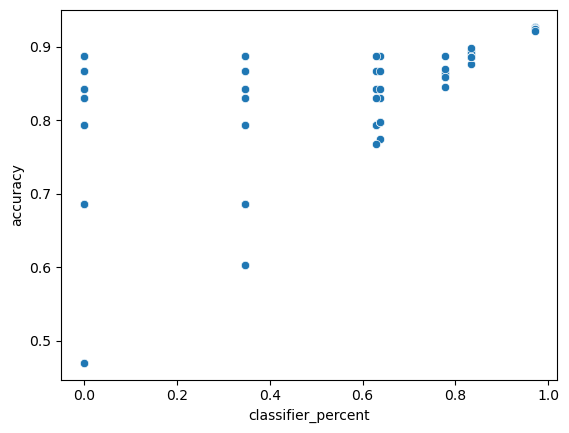

In [21]:
sns.scatterplot(data = res_df, x="classifier_percent", y = "accuracy")

<AxesSubplot:xlabel='max_thresh', ylabel='regression_accuracy'>

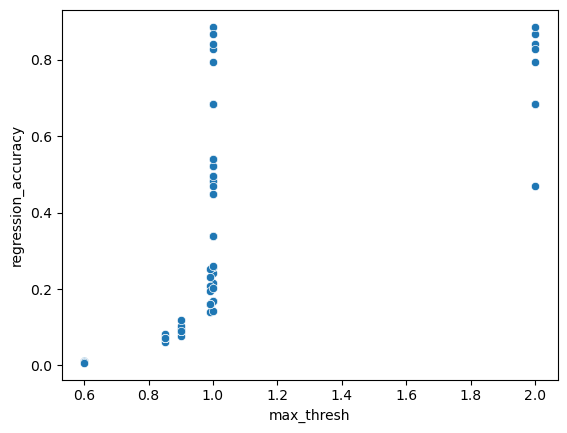

In [22]:
sns.scatterplot(data = res_df, x="max_thresh", y = "regression_accuracy")

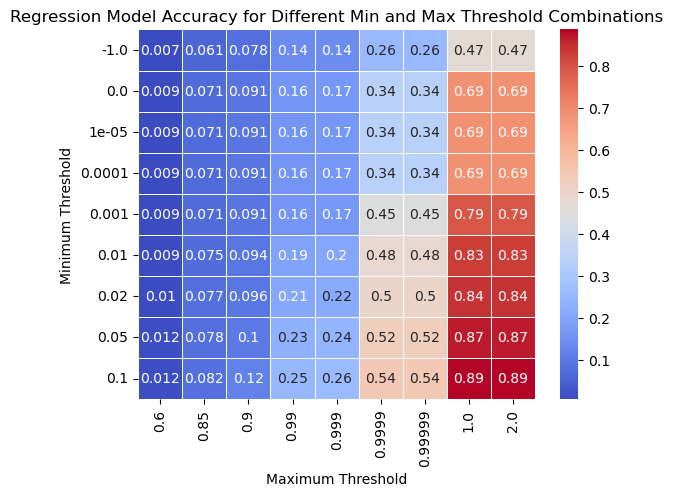

In [82]:
pt=res_df.pivot(index="min_thresh", columns="max_thresh", values="regression_accuracy")
sns.heatmap(pt, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Maximum Threshold")
plt.ylabel("Minimum Threshold")
plt.title("Regression Model Accuracy for Different Min and Max Threshold Combinations")
plt.savefig("../plots/reg_acc_heat.png",bbox_inches='tight')

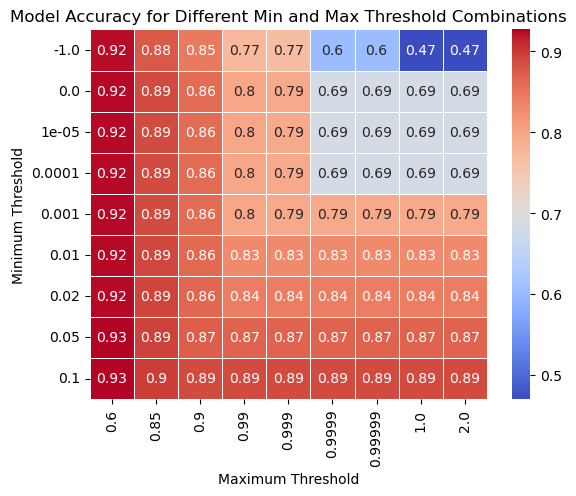

In [83]:
pt=res_df.pivot(index="min_thresh", columns="max_thresh", values="accuracy")
sns.heatmap(pt, annot=True, cmap="coolwarm", linewidths=0.5, )
plt.xlabel("Maximum Threshold")
plt.ylabel("Minimum Threshold")
plt.title("Model Accuracy for Different Min and Max Threshold Combinations")
plt.savefig("../plots/model_acc_heat.png",bbox_inches='tight')

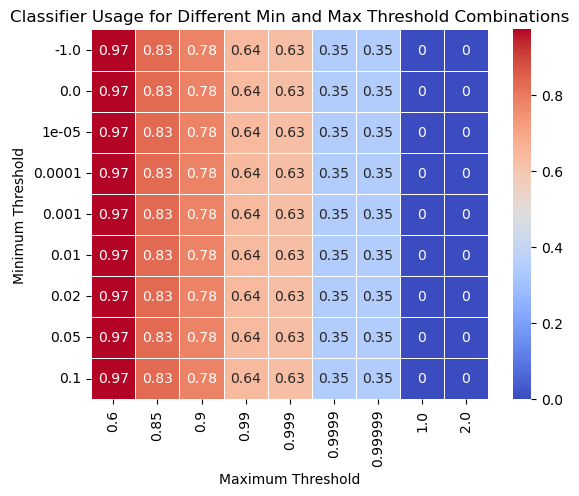

In [84]:
pt=res_df.pivot(index="min_thresh", columns="max_thresh", values="classifier_percent")
sns.heatmap(pt, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Maximum Threshold")
plt.ylabel("Minimum Threshold")
plt.title("Classifier Usage for Different Min and Max Threshold Combinations")
plt.savefig("../plots/classifier_usage.png",bbox_inches='tight')

In [71]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
min_threshold,0.1,0.02,0.0,0.05,0.02,0.01,0.01,0.05,0.05,0.05,...,-1.0,0.0001,0.0,0.1,0.00001,0.0001,0.001,-1.0,0.0001,0.001
max_threshold,0.99999,0.999,0.9999,0.85,0.99,0.9,0.85,0.999,0.9999,2.0,...,1.0,0.85,0.9,0.9,0.6,0.99,0.99,0.6,1.0,0.9999
res0,"('field_goal', -0.0035748686641454697)",field_goal,"('field_goal', -0.0035748686641454697)",field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', -0.0035748686641454697)","('field_goal', -0.0035748686641454697)",...,"('punt', 0.02120721898972988)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', -0.0035748686641454697)","('field_goal', -0.0035748686641454697)"
res1,"('pass', 0.0022958742920309305)","('run', 0.008796891197562218)","('run', 0.008796891197562218)",pass,"('run', 0.008796891197562218)","('run', 0.008796891197562218)",pass,"('punt', 0.00831572338938713)","('punt', 0.00831572338938713)","('punt', 0.00831572338938713)",...,"('run', 0.008796891197562218)",pass,"('run', 0.008796891197562218)","('pass', 0.0022958742920309305)",pass,"('run', 0.008796891197562218)","('run', 0.008796891197562218)",pass,"('run', 0.008796891197562218)","('run', 0.008796891197562218)"
res2,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.10374753922224045)",...,"('field_goal', 0.10374753922224045)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.10374753922224045)",field_goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
res4686,"('punt', -0.02481570467352867)",punt,"('pass', 0.03573529049754143)",punt,punt,punt,punt,punt,"('punt', -0.02481570467352867)","('punt', -0.02481570467352867)",...,"('field_goal', 0.047919075936079025)",punt,punt,punt,punt,punt,punt,punt,"('pass', 0.03573529049754143)","('punt', -0.02481570467352867)"
res4687,"('field_goal', -0.055295247584581375)",field_goal,"('pass', -0.014823885634541512)",field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', -0.055295247584581375)","('field_goal', -0.055295247584581375)",...,"('run', 0.009301752783358097)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('pass', -0.014823885634541512)","('field_goal', -0.055295247584581375)"
res4688,"('punt', 0.04688672348856926)","('punt', 0.04688672348856926)","('punt', 0.04688672348856926)",punt,"('punt', 0.04688672348856926)",punt,punt,"('punt', 0.04688672348856926)","('punt', 0.04688672348856926)","('punt', 0.04688672348856926)",...,"('punt', 0.04688672348856926)",punt,punt,punt,punt,"('punt', 0.04688672348856926)","('punt', 0.04688672348856926)",punt,"('punt', 0.04688672348856926)","('punt', 0.04688672348856926)"
res4689,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.03973030298948288)",...,"('field_goal', 0.03973030298948288)",field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,field_goal,"('field_goal', 0.03973030298948288)",field_goal


In [85]:
min_thresh = 0.1
max_thresh = 0.9
df = pd.read_csv(f"{folder}/accum_results.csv")
df = df.drop("Unnamed: 0", axis=1)
df


,min_threshold,max_threshold,res0,res1,res2,res3,res4,res5,res6,res7,...,res4681,res4682,res4683,res4684,res4685,res4686,res4687,res4688,res4689,res4690
0,0.1000,0.99999,"('field_goal', -0.0035748686641454697)","('pass', 0.0022958742920309305)",field_goal,punt,"('field_goal', 0.03830188140273094)",punt,"('punt', -0.0013393854023888707)","('punt', 0.008433896116912365)",...,punt,"('field_goal', -0.0041305082850158215)",punt,punt,punt,"('punt', -0.02481570467352867)","('field_goal', -0.055295247584581375)","('punt', 0.04688672348856926)",field_goal,punt
1,0.0200,0.99900,field_goal,"('run', 0.008796891197562218)",field_goal,punt,field_goal,punt,punt,"('punt', 0.008433896116912365)",...,punt,field_goal,punt,punt,punt,punt,field_goal,"('punt', 0.04688672348856926)",field_goal,punt
2,0.0000,0.99990,"('field_goal', -0.0035748686641454697)","('run', 0.008796891197562218)",field_goal,punt,"('field_goal', 0.03830188140273094)",punt,"('punt', -0.0013393854023888707)","('punt', 0.008433896116912365)",...,punt,"('pass', 0.00037323933793231845)",punt,punt,punt,"('pass', 0.03573529049754143)","('pass', -0.014823885634541512)","('punt', 0.04688672348856926)",field_goal,punt
3,0.0500,0.85000,field_goal,pass,field_goal,punt,field_goal,punt,punt,punt,...,punt,field_goal,punt,punt,punt,punt,field_goal,punt,field_goal,punt
4,0.0200,0.99000,field_goal,"('run', 0.008796891197562218)",field_goal,punt,field_goal,punt,punt,"('punt', 0.008433896116912365)",...,punt,field_goal,punt,punt,punt,punt,field_goal,"('punt', 0.04688672348856926)",field_goal,punt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.0001,0.99000,field_goal,"('run', 0.008796891197562218)",field_goal,punt,field_goal,punt,punt,"('punt', 0.008433896116912365)",...,punt,field_goal,punt,punt,punt,punt,field_goal,"('punt', 0.04688672348856926)",field_goal,punt
77,0.0010,0.99000,field_goal,"('run', 0.008796891197562218)",field_goal,punt,field_goal,punt,punt,"('punt', 0.008433896116912365)",...,punt,field_goal,punt,punt,punt,punt,field_goal,"('punt', 0.04688672348856926)",field_goal,punt
78,-1.0000,0.60000,field_goal,pass,field_goal,punt,field_goal,punt,punt,punt,...,punt,field_goal,punt,punt,punt,punt,field_goal,punt,field_goal,punt
79,0.0001,1.00000,"('field_goal', -0.0035748686641454697)","('run', 0.008796891197562218)","('field_goal', 0.10374753922224045)","('punt', -0.024795500561594963)","('field_goal', 0.03830188140273094)","('punt', 0.02007339708507061)","('punt', -0.0013393854023888707)","('punt', 0.008433896116912365)",...,"('punt', 0.00020953045168425888)","('pass', 0.00037323933793231845)","('punt', -0.014586002565920353)","('punt', 0.022918973118066788)","('punt', -0.00978291966021061)","('pass', 0.03573529049754143)","('pass', -0.014823885634541512)","('punt', 0.04688672348856926)","('field_goal', 0.03973030298948288)","('punt', 0.003942524548619986)"


In [86]:
exclude_indices = ["min_threshold", "max_threshold"]

y_pred = df[(df['min_threshold'] == min_thresh) & (df['max_threshold'] == max_thresh)].drop(exclude_indices, axis=1).transpose().iloc[:, 0].tolist()
y_pred

['field_goal',
 "('pass', 0.0022958742920309305)",
 'field_goal',
 'punt',
 'field_goal',
 'punt',
 'punt',
 'punt',
 "('pass', 0.07152185589075089)",
 'punt',
 'punt',
 'punt',
 "('run', 0.03853410482406616)",
 "('punt', 0.024315830320119858)",
 'punt',
 'field_goal',
 'field_goal',
 "('pass', -0.004803643096238375)",
 'punt',
 "('pass', 0.07116320729255676)",
 'punt',
 'punt',
 'punt',
 'pass',
 'field_goal',
 'punt',
 'field_goal',
 'field_goal',
 'punt',
 'punt',
 'punt',
 'field_goal',
 'punt',
 'field_goal',
 'field_goal',
 'punt',
 'field_goal',
 'field_goal',
 "('pass', -0.05622373893857002)",
 "('run', 0.045448943972587585)",
 'punt',
 'punt',
 'punt',
 'punt',
 "('run', 0.08467203378677368)",
 'field_goal',
 'punt',
 "('run', 0.04734909534454346)",
 "('run', 0.024674538522958755)",
 'punt',
 'punt',
 'punt',
 'punt',
 'punt',
 'field_goal',
 'field_goal',
 'punt',
 "('run', 0.02134721539914608)",
 'punt',
 'field_goal',
 'punt',
 'punt',
 'punt',
 "('pass', -0.004291594028472

In [74]:
differences = []
for i,(y_true, y_hat) in enumerate(zip(y_test["play_type"].tolist(), y_pred)):
    wpa = None
    if y_hat[0] == "(":
        y_hat, wpa = ast.literal_eval(y_hat)
        
        
    
    
    differences.append((i,y_true, y_hat, wpa))
        

In [75]:
differences=pd.DataFrame(differences)
differences = differences.rename(columns={0: 'index', 
                                          1: 'y_true', 
                                          2 : 'y_pred', 
                                          3 : "wpa"})



In [76]:
differences['wpa'].isna().sum()

49

In [77]:
ct = pd.crosstab(differences["y_true"], differences["y_pred"])
ct

y_pred,field_goal,pass,punt,run
y_true,,,,
field_goal,0,7,0,0
pass,7,0,89,141
punt,0,62,0,21
run,0,182,22,0


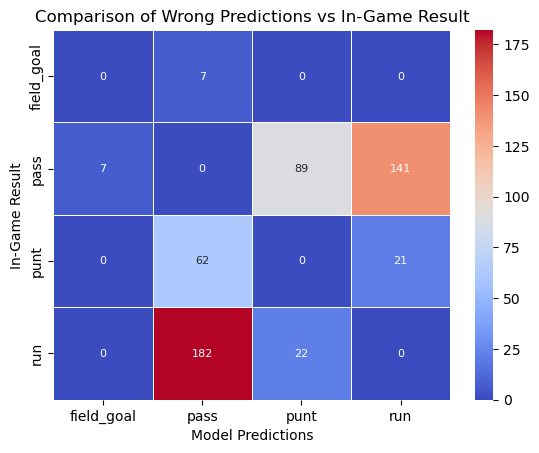

In [78]:
sns.heatmap(ct ,annot=True, cmap="coolwarm", linewidths=0.5, fmt='.4g', annot_kws={"size": 8})
plt.xlabel("Model Predictions")
plt.ylabel("In-Game Result")
plt.title("Comparison of Wrong Predictions vs In-Game Result")
plt.savefig("../plots/wrong_preds_heat.png")

In [79]:
differences["y_true"].value_counts()

pass          237
run           204
punt           83
field_goal      7
Name: y_true, dtype: int64

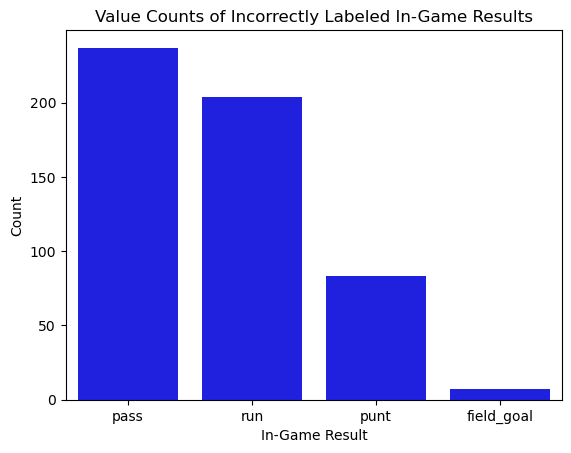

In [80]:
sns.barplot(data = differences['y_true'].value_counts(), color="blue")
plt.title("Value Counts of Incorrectly Labeled In-Game Results")
plt.xlabel("In-Game Result")
plt.ylabel("Count")
plt.savefig("../plots/wrong_model_preds_label.png")

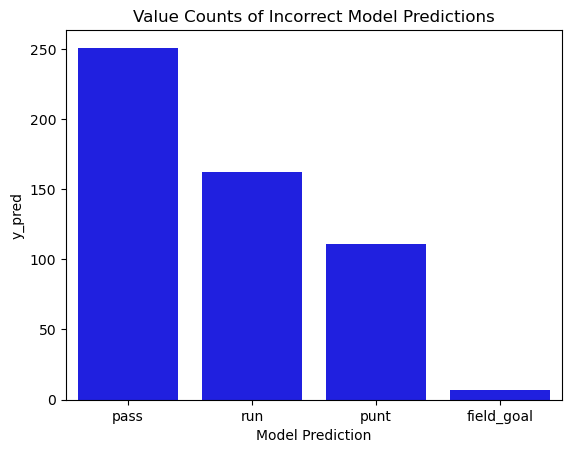

In [81]:
sns.barplot(data = differences['y_pred'].value_counts(), color="blue")
plt.title("Value Counts of Incorrect Model Predictions")
plt.xlabel("Model Prediction")
plt.savefig("../plots/wrong_model_preds.png")